In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [340]:
df=pd.read_csv(r'C:\Users\USER\Desktop\Modcode\ML_Live-_Class\data\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [341]:
df.isnull().sum()/len(df)*100.

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [342]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [343]:
df.shape

(768, 9)

In [344]:
corr = df.corr()

In [345]:
top_corr = corr.index

<AxesSubplot:>

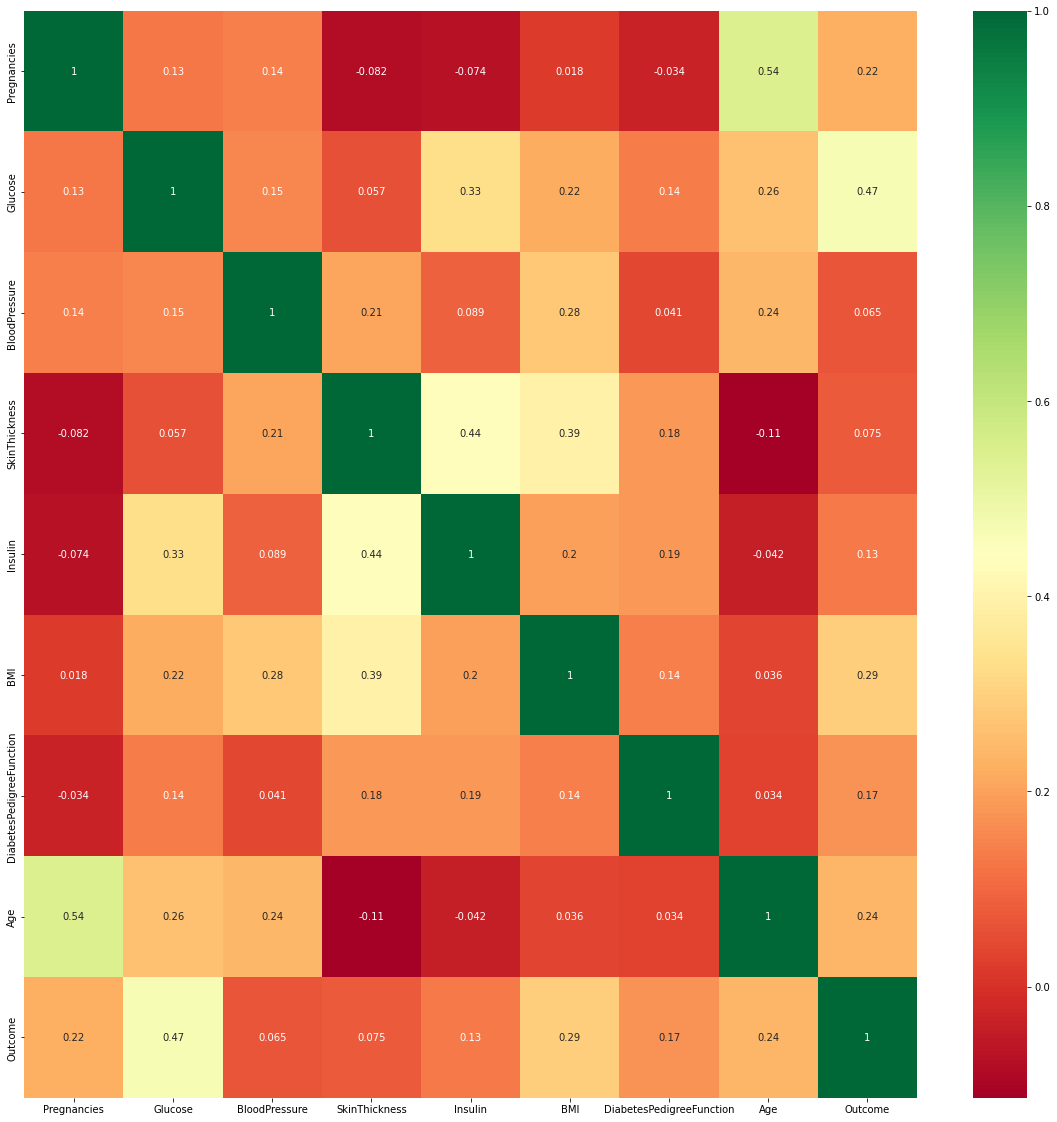

In [346]:
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr].corr(),annot=True, cmap="RdYlGn")

In [347]:
# if your output is not mapped as in a string e.g false or true, do this using map function
#  outcome_map = {True:1, False:0}
#  df['outcome'] = df['outcome'].map(outcome_map)

In [348]:
outcome_true_count = len(df.loc[df['Outcome'] == True])
outcome_False_count = len(df.loc[df['Outcome'] == False])




In [349]:
(outcome_true_count,outcome_False_count)

(268, 500)

In [350]:
X = df.drop(['Outcome'], axis=1)

In [351]:
y = df['Outcome']

In [352]:
X.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [353]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [354]:
from sklearn.model_selection import train_test_split

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [356]:
print('total number of ros : {0}'.format(len(df)))
print('total number of ros missing Pregnancies: {0}'.format(len(df.loc[df['Pregnancies'] == 0])))
print('total number of ros missing Glucose: {0}'.format(len(df.loc[df['Glucose'] == 0])))
print('total number of ros missing BloodPressure: {0}'.format(len(df.loc[df['BloodPressure'] == 0])))
print('total number of ros missing SkinThickness: {0}'.format(len(df.loc[df['SkinThickness'] == 0])))
print('total number of ros missing Insulin: {0}'.format(len(df.loc[df['Insulin'] == 0])))
print('total number of ros missing BMI: {0}'.format(len(df.loc[df['BMI'] == 0])))
print('total number of ros missing DiabetesPedigreeFunction: {0}'.format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print('total number of ros missing Age: {0}'.format(len(df.loc[df['Age'] == 0])))

total number of ros : 768
total number of ros missing Pregnancies: 111
total number of ros missing Glucose: 5
total number of ros missing BloodPressure: 35
total number of ros missing SkinThickness: 227
total number of ros missing Insulin: 374
total number of ros missing BMI: 11
total number of ros missing DiabetesPedigreeFunction: 0
total number of ros missing Age: 0


In [357]:
from sklearn.impute import SimpleImputer

In [358]:
fill_values = SimpleImputer(missing_values=0, strategy="mean")

In [359]:
X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [360]:
from sklearn.linear_model import LogisticRegression

In [361]:
logistic_model = LogisticRegression(random_state=0, max_iter=1000)

In [362]:
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [363]:
Y_pred = logistic_model.predict(X_test)

In [364]:
from sklearn import metrics

In [365]:
print('accuracy = {0:3f}'.format(metrics.accuracy_score(y_test,Y_pred)))

accuracy = 0.735931


In [366]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [367]:
param_grid = {'penalty':['l1','l2'], 'class_weight':['dict', 'balanced'], 'solver':['newton-cg', 'lbfgs','liblinear']}

In [368]:
logistic_modell = LogisticRegression()

In [369]:
logistic_model2 = GridSearchCV(logistic_modell,param_grid=param_grid, scoring='accuracy',cv=10)

In [370]:
logistic_model2.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'class_weight': ['dict', 'balanced'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [371]:
print('tuned hyperparameters:', logistic_model2.best_params_)
print('Accuracy:', logistic_model2.best_score_)

tuned hyperparameters: {'class_weight': 'dict', 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.7820055904961565


In [372]:
y_pred2 = logistic_model2.predict(X_test)

In [373]:
from sklearn.metrics import confusion_matrix

In [374]:
conf_max = confusion_matrix(y_test,y_pred2)
conf_max

array([[125,  19],
       [ 42,  45]], dtype=int64)

In [375]:
#LOGISTIC REGRESSION PART 2

In [376]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Modcode\ML_Live-_Class\data\hearing_test.csv')

In [377]:
df.head(5)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [378]:
df.shape

(5000, 3)

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [380]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [381]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

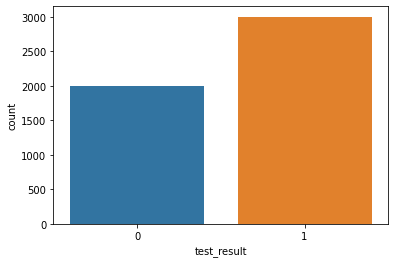

In [382]:
sns.countplot(data=df, x='test_result')

In [383]:
#if you need to see ho the features are distributed you can use a box plot to vie maybe its balanced or imbalanced data set

<AxesSubplot:xlabel='test_result', ylabel='age'>

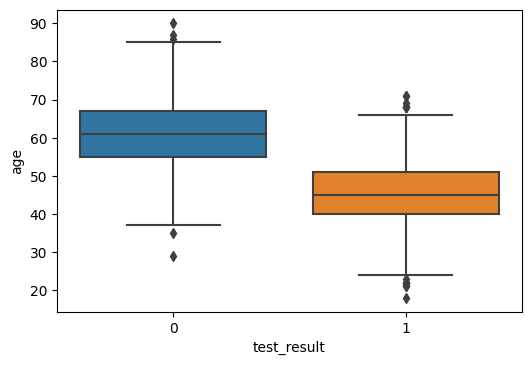

In [384]:
plt.figure(dpi=100)
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

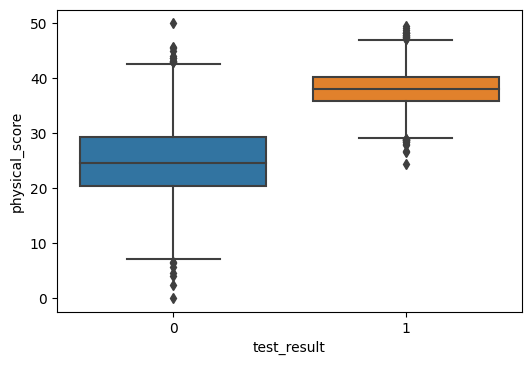

In [385]:
plt.figure(dpi=100)
sns.boxplot(x='test_result',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

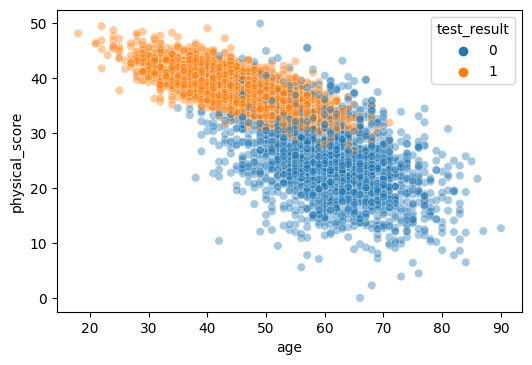

In [386]:
plt.figure(dpi=100)
sns.scatterplot(x='age', y='physical_score',data=df,hue='test_result',alpha=0.4)

<Figure size 510x340 with 0 Axes>

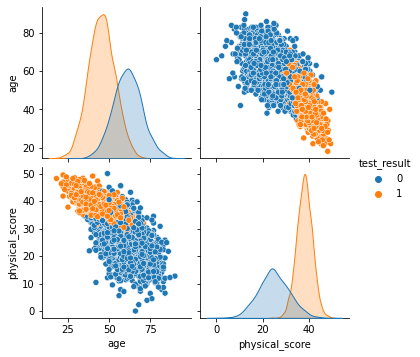

In [387]:
plt.figure(dpi=85)
sns.pairplot(df, hue = 'test_result')

<AxesSubplot:>

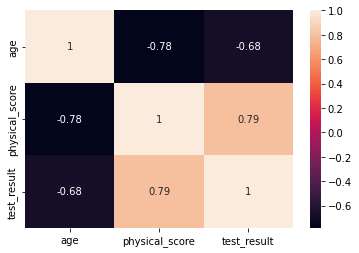

In [388]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

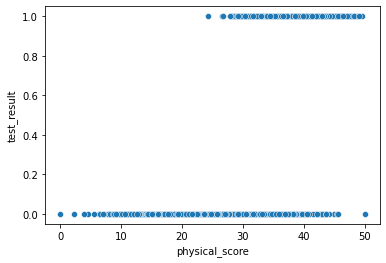

In [389]:
sns.scatterplot(x='physical_score', y='test_result', data=df) # this is not a good way for showing classes, try the 3d scatter plot

<Figure size 600x400 with 0 Axes>

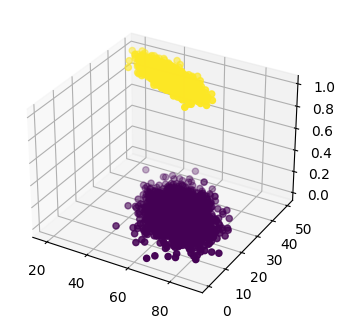

In [390]:
plt.figure(dpi=100)
fig = plt.figure(dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

# this can only be done for 2 classes binary classification

In [391]:
X=df.drop('test_result', axis=1)

In [392]:
y = df['test_result']

In [393]:
# perform a feature scalling , if not your gradient descent based algorith ould not give a proper accuracy, but perform train-test-split
#before scalling

In [394]:
from sklearn.model_selection import train_test_split

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=10)

In [396]:
from sklearn.preprocessing import StandardScaler

In [397]:
scaler = StandardScaler()

In [398]:
scaled_x_train = scaler.fit_transform(X_train)

In [399]:
scaled_x_test = scaler.fit_transform(X_test)

In [400]:
from sklearn.linear_model import LogisticRegression

In [401]:
log_model = LogisticRegression()

In [402]:
log_model.fit(scaled_x_train,y_train)

LogisticRegression()

In [403]:
log_model.coef_

array([[-0.90479146,  3.59541943]])

In [404]:
y_pred = log_model.predict(scaled_x_test)

In [405]:
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,

In [406]:
y_pred[0]

1

In [407]:
df.head(1)

,age,physical_score,test_result
0,33.0,40.7,1


In [416]:
y_pred2= log_model.predict_proba(scaled_x_test)

In [417]:
y_pred2

array([[8.59208672e-03, 9.91407913e-01],
       [9.98536530e-01, 1.46347029e-03],
       [9.96693828e-01, 3.30617208e-03],
       [9.89174211e-01, 1.08257887e-02],
       [7.12323324e-01, 2.87676676e-01],
       [5.63372700e-02, 9.43662730e-01],
       [3.55126421e-03, 9.96448736e-01],
       [1.00832548e-02, 9.89916745e-01],
       [9.98930691e-01, 1.06930913e-03],
       [9.99987963e-01, 1.20374195e-05],
       [2.37429930e-01, 7.62570070e-01],
       [2.75606729e-02, 9.72439327e-01],
       [8.36558783e-03, 9.91634412e-01],
       [1.39185743e-01, 8.60814257e-01],
       [1.30805959e-01, 8.69194041e-01],
       [1.73076085e-02, 9.82692391e-01],
       [1.38109964e-01, 8.61890036e-01],
       [1.83091048e-03, 9.98169090e-01],
       [5.39962598e-02, 9.46003740e-01],
       [1.27768458e-01, 8.72231542e-01],
       [7.55600449e-02, 9.24439955e-01],
       [1.70843784e-01, 8.29156216e-01],
       [9.51692405e-04, 9.99048308e-01],
       [1.46883650e-01, 8.53116350e-01],
       [1.013327

In [418]:
y_pred[2]

0

In [411]:
# Classification metrics

In [419]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [420]:
accuracy_score(y_test, y_pred)

0.906

In [421]:
confusion_matrix(y_test, y_pred)

array([[169,  24],
       [ 23, 284]], dtype=int64)

In [422]:
from sklearn.metrics import plot_confusion_matrix

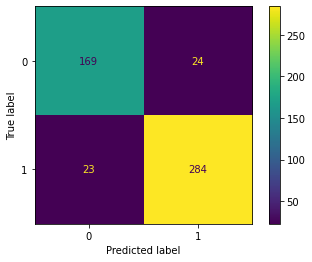

In [423]:
plot_confusion_matrix(log_model,scaled_x_test,y_test)  #diff in colour means your model is good

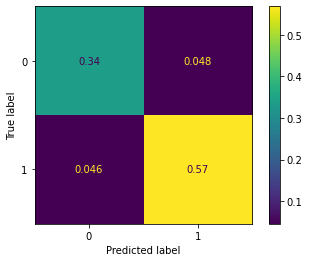

In [424]:
plot_confusion_matrix(log_model,scaled_x_test,y_test, normalize='all')

In [427]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       193
           1       0.92      0.93      0.92       307

    accuracy                           0.91       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.91      0.91      0.91       500



In [428]:
from sklearn.metrics import precision_score, recall_score

In [430]:
precision_score(y_pred, y_test)

0.9250814332247557

In [432]:
recall_score(y_test, y_pred)

0.9250814332247557

In [433]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

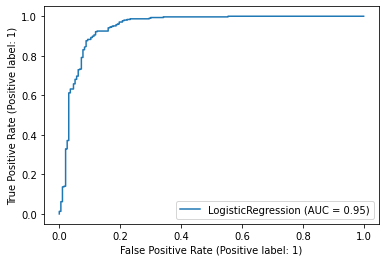

In [434]:
plot_roc_curve(log_model,scaled_x_test,y_test) 

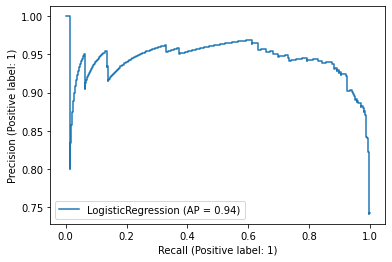

In [435]:
plot_precision_recall_curve(log_model,scaled_x_test,y_test)